In [12]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn 

from sklearn import datasets, linear_model, metrics, tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import ElasticNet, Lasso,  RidgeCV

from sklearn.neighbors import KNeighborsRegressor

        
# Dataset splitting        
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV

# Errors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib



In [13]:
df_emi = pd.read_csv("dataset_scaled_emission.csv")
df_emi

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,other_2_amount_mmol,...,x5_zinc stearate,x5_zinc undecylenate,x6_None,x6_copper bromide,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,0,0,0.713177,0.328895,-0.453863,-0.453709,-0.297521,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.7,622.0,680
1,1,1,1,-0.336633,-0.477469,-0.453863,-0.453709,-0.076698,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.5,445.0,568
2,2,2,2,0.713177,0.328895,-0.453863,-0.453709,-0.076698,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5,543.0,589
3,14,14,14,-0.336633,-0.679060,0.168592,-0.219170,-0.232497,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.7,580.0,588
4,28,28,28,-0.756556,-0.800014,-0.358664,-0.185664,-0.354175,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.1,460.0,590
5,55,55,55,-0.730311,-0.779855,-0.344018,0.015370,-0.394734,-0.657695,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,None,460.0,480
6,57,57,57,-0.599085,-0.779855,-0.234173,0.015370,-0.072835,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.26,584.0,615
7,58,58,58,-0.074180,-0.477469,0.205208,0.015370,0.249064,0.096889,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,430.0,477
8,59,59,59,4.387509,1.135259,4.855318,0.024751,-0.394734,-0.749374,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.1,555.0,595
9,63,63,63,-0.205407,-0.376673,0.095362,1.422607,1.536660,1.366283,-0.186270,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5,562.0,618


In [14]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'ligand_amount_mmol',
             'first_sol_amount_ml',
             'second_sol_amount_ml',
             'other_1_amount_mmol',
             'other_2_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_lauric acid',
             'x2_myristic acid',
             'x2_oleic acid',
             'x2_palmitic acid',
             'x2_stearic acid',
             'x3_dodecylamine',
             'x3_octadecene',
             'x3_oleylamine',
             'x3_trioctylamine',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_dioctyl ether',
             'x4_dioctylamine',
             'x4_hexadecylamine',
             'x4_octylamine',
             'x4_oleylamine',
             'x4_toluene',
             'x4_trioctylphosphine',
             'x4_trioctylphosphine oxide',
             'x5_None',
             'x5_acetic acid',
             'x5_superhydride',
             'x5_tetrabutylammonium myristate',
             'x5_zinc bromide'
             ,'x5_zinc chloride'
             ,'x5_zinc iodide'
             ,'x5_zinc oleate',
             'x5_zinc stearate',
             'x5_zinc undecylenate',
             'x6_None',
             'x6_copper bromide',
             'x6_trioctylphosphine',
             'x6_water',
             'x6_zinc iodide',
             'abs_nm'
             ]

output_col = ['emission_nm']

X = df_emi[input_col]

Y = df_emi[output_col]

In [15]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [5]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 60, 2):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [11:23<00:00, 23.57s/it]

16.20580357142856 4 2 12


### 2. Decision Trees

In [8]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:28<00:00,  5.11s/it]

5.868055555555557 7 9 32


In [ ]:
DT_regr = DecisionTreeRegressor(max_depth=5,
                                max_features=9,
                                random_state=60)
            
DT_regr.fit(X_train, np.ravel(Y_train))
            
DT_Y_pred = B_regr.predict(X_test)
            
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
DT_mse = mean_squared_error(Y_test, DT_Y_pred)
print("Mean absolute error =", round(DT_mae,3), '\n' "Mean squared error =", round(DT_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, DT_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(DT_mae,3) , fontdict=None)
plt.show()

### 3. Random Forrest

In [9]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [04:28<00:00, 11.21s/it]

18.860714285714295 6 2 24


In [15]:
RF_regr = RandomForestRegressor(max_depth=6, n_estimators=1, max_features=20, random_state=45)
RF_regr.fit(X_train, np.ravel(Y_train))
RF_Y_pred = RF_regr.predict(X_test)
mae = mean_absolute_error(Y_test, RF_Y_pred)
print(mae)

14.02307692307692


In [9]:
min_mae = 9999
min_a = 0
for a in tqdm(range(1,100)):
    RF_regr = RandomForestRegressor(max_depth=11, n_estimators=3, max_features=30, random_state=a)
    RF_regr.fit(X_train, np.ravel(Y_train))
    RF_Y_pred = RF_regr.predict(X_test)
    mae = mean_absolute_error(Y_test, RF_Y_pred)
    if (min_mae > mae):
        min_mae = mae
        min_a = a
print(min_mae, min_a)    

100%|██████████| 99/99 [00:00<00:00, 110.61it/s]

14.794871794871794 45


### 4. Extra Trees

In [10]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 34)):
    for j in range(1, 34):
        for k in range(2, 60, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 33/33 [20:24<00:00, 37.10s/it]

7.5 1 7 41


Mean absolute error = 11.0 
Mean squared error = 167.654


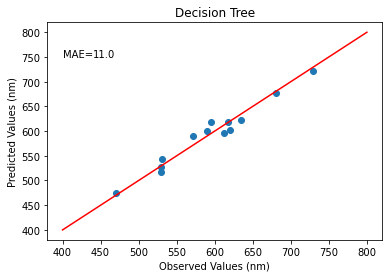

In [11]:
ET_regr = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=26,
                                            random_state=46)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
ET_mse = mean_squared_error(Y_test, ET_Y_pred)
print("Mean absolute error =", round(ET_mae,3), '\n' "Mean squared error =", round(ET_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, ET_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(ET_mae,3) , fontdict=None)
plt.show()

### 6. Others

In [10]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  16.184615384615373 

Ridge
 MAE for diameter is  18.110791212932252 

Lasso
 MAE for diameter is  19.560952909058933 

ElasticNet
 MAE for diameter is  18.19936624046899 



## Conclusion

Decision Tree gave the best performance.

### Saving model

In [16]:
DT_regr = DecisionTreeRegressor(max_depth=7,
                                max_features=9,
                                random_state=32)
            
DT_regr.fit(X_train, Y_train)

DT_Y_pred = DT_regr.predict(X_test)
            
joblib.dump(DT_regr, "./model_aug_emission_DecisionTree.joblib")


['./model_aug_emission_DecisionTree.joblib']